In [6]:
import pandas as pd

import numpy as np

import matplotlib as plt

%matplotlib inline

In [2]:
df = pd.read_csv ("/home/noxd/computacional/a5/mnz.csv")

In [3]:
df.head(10)

,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,231
1,2016,1,1,1,263
2,2016,1,1,2,299
3,2016,1,1,3,334
4,2016,1,1,4,359
5,2016,1,1,5,375
6,2016,1,1,6,387
7,2016,1,1,7,400
8,2016,1,1,8,411
9,2016,1,1,9,418


In [4]:
df.describe()

,anio,mes,dia,hora(utc)
count,8784.0,8784.000000,8784.000000,8784.000000
mean,2016.0,6.513661,15.756831,11.500000
std,0.0,3.451430,8.812031,6.922581
min,2016.0,1.000000,1.000000,0.000000
25%,2016.0,4.000000,8.000000,5.750000
50%,2016.0,7.000000,16.000000,11.500000
75%,2016.0,10.000000,23.000000,17.250000
max,2016.0,12.000000,31.000000,23.000000


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
dtype: int64

In [9]:

from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)



In [10]:
df.head()

,anio,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,231,2016-01-01 00:00:00
1,2016,1,1,1,263,2016-01-01 01:00:00
2,2016,1,1,2,299,2016-01-01 02:00:00
3,2016,1,1,3,334,2016-01-01 03:00:00
4,2016,1,1,4,359,2016-01-01 04:00:00


In [11]:
df_short=df.drop(df.columns[[0,1,2,3]],axis=1)

In [13]:


h=df_short.columns.tolist()

h=h[-1:] + h[:-1]



In [14]:
h

['date', 'altura(mm)']

In [15]:
df_short=pd.DataFrame(df_short[h])

In [16]:
df_short

,date,altura(mm)
0,2016-01-01 00:00:00,231
1,2016-01-01 01:00:00,263
2,2016-01-01 02:00:00,299
3,2016-01-01 03:00:00,334
4,2016-01-01 04:00:00,359
5,2016-01-01 05:00:00,375
6,2016-01-01 06:00:00,387
7,2016-01-01 07:00:00,400
8,2016-01-01 08:00:00,411
9,2016-01-01 09:00:00,418


In [17]:


import scipy
a = df_short['altura(mm)'].astype(float).interpolate(method='spline', order=2)



In [18]:
df_short['altura(mm)']= df_short['altura(mm)'].astype(float).interpolate(method='spline', order=2)

In [19]:
df_short.set_index([u'date'],inplace=True)

In [20]:
df_short

,altura(mm)
date,
2016-01-01 00:00:00,231.000000
2016-01-01 01:00:00,263.000000
2016-01-01 02:00:00,299.000000
2016-01-01 03:00:00,334.000000
2016-01-01 04:00:00,359.000000
2016-01-01 05:00:00,375.000000
2016-01-01 06:00:00,387.000000
2016-01-01 07:00:00,400.000000
2016-01-01 08:00:00,411.000000


In [21]:
df_short.columns

Index([u'altura(mm)'], dtype='object')

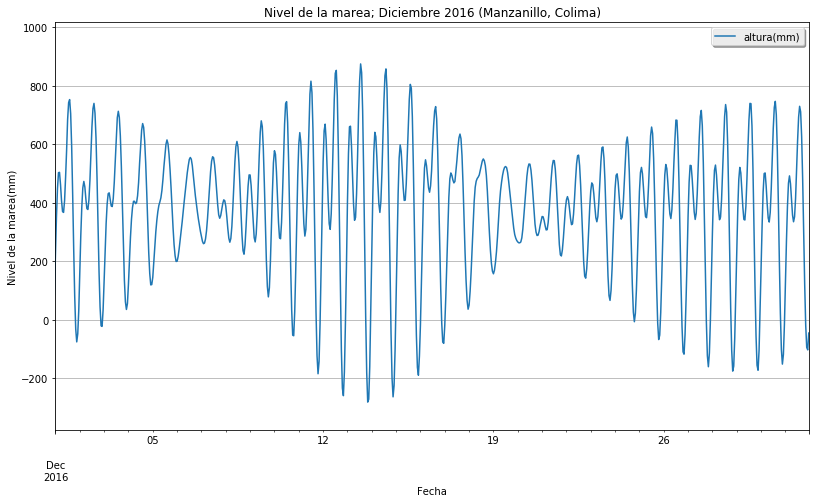

In [28]:
import matplotlib.pyplot as mplt



x=df_short.plot()
x.set_xlim(pd.Timestamp('2016-12-01 00:00:00'), pd.Timestamp('2016-12-31 23:00:00'))
mplt.ylabel('Nivel de la marea(mm)')
mplt.xlabel('Fecha')
mplt.title('Nivel de la marea; Diciembre 2016 (Manzanillo, Colima)')
mplt.legend(fancybox=True, shadow=True)
mplt.grid(True)

fig = mplt.gcf()
fig.set_size_inches(13.5, 7.5)